This notebook trains a neural network with TCGA as the only data seen during training and CNV are used as input. 

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from TcgaClassifierModel import ModelTCGAClassifier

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'ldr': 0.1891970559768379,
 'lr': 0.439931018371135,
 'weight_decay': 0.0337143915425986,
 'momentum': 0.3935771598480642,
 'step_size': 86,
 'loops_train': 300,
 'hd': 4,
 'batch_size': 32,
 'seed': 42}

In [8]:
model_PACLITAXEL = ModelTCGAClassifier('PACLITAXEL', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.1891970559768379, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.1891970559768379, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.1891970559768379, 'lr': 0.439931018371135, 'weight_decay': 0.0337143915425986, 'momentum': 0.3935771598480642, 'step_size': 86, 'loops_train': 300, 'hd': 4, 'batch_size': 32, 'seed': 42}
-------PACLITAXEL-------
tcga train set size: 

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.603261,0.839627


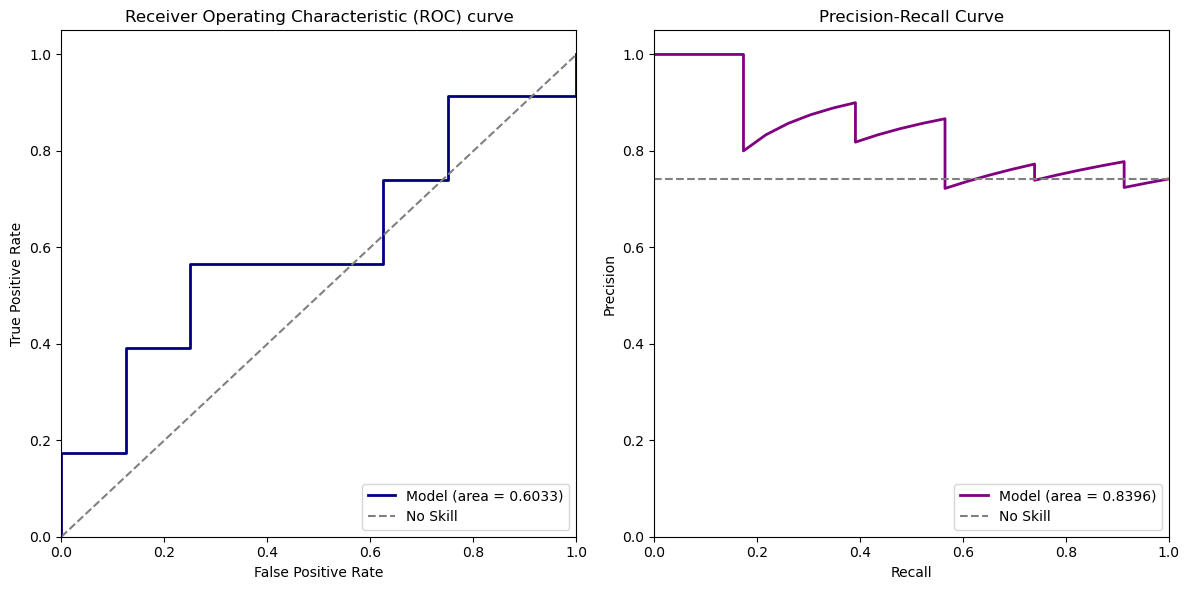

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,35,"{0: 30, 1: 5}",0.413333,0.146040
0,TCGA,82,"{1: 53, 0: 29}",0.983084,0.989068


Distribution of Predictions by Model
[0.32416579 0.64060578 0.78375793 0.82975179 0.88157523]
TP: 21, FP: 8, TN: 0, FN: 2


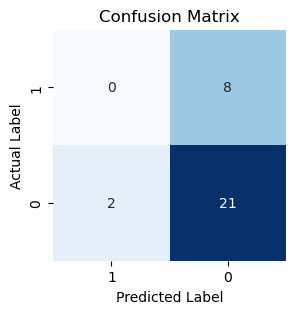

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

### CISPLATIN

In [12]:
best_parameters = {'ldr': 0.5437141243400625,
 'lr': 0.3560967423831188,
 'weight_decay': 0.06289403716019226,
 'momentum': 0.2114399739758569,
 'step_size': 37,
 'loops_train': 150,
 'hd': 4,
 'batch_size': 32,
 'seed': 42}

In [13]:
model_CISPLATIN = ModelTCGAClassifier('CISPLATIN', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5437141243400625, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.5437141243400625, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.5437141243400625, 'lr': 0.3560967423831188, 'weight_decay': 0.06289403716019226, 'momentum': 0.2114399739758569, 'step_size': 37, 'loops_train': 150, 'hd': 4, 'batch_size': 32, 'seed': 42}
-------CISPLATIN-------
tcga train set size:

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,36,"{1: 27, 0: 9}",0.54321,0.819404


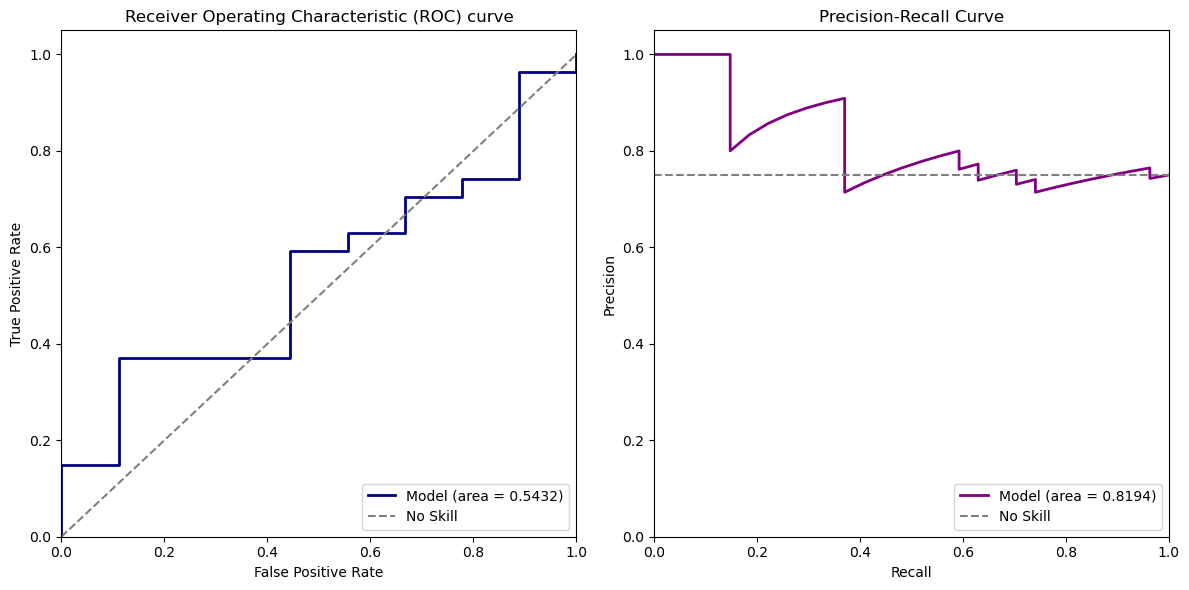

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.518269,0.777984


Distribution of Predictions by Model
[0.8667056  0.8670437  0.86722624 0.86738081 0.86790711]
TP: 27, FP: 9, TN: 0, FN: 0


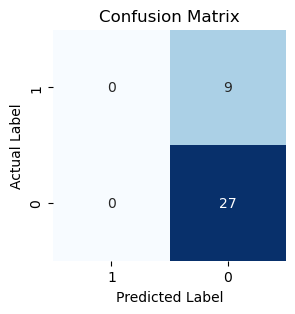

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'ldr': 0.23738495068380366,
 'batch_size': 32,
 'lr': 0.21637444808774317,
 'weight_decay': 0.004483637128685381,
 'momentum': 0.18040106486035892,
 'step_size': 87,
 'loops_train': 150,
 'hd': 2,
 'seed': 42}

In [18]:
model_5_FLUOROURACIL = ModelTCGAClassifier('5-FLUOROURACIL', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.23738495068380366, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.23738495068380366, 'batch_size': 32, 'lr': 0.21637444808774317, 'weight_decay': 0.004483637128685381, 'momentum': 0.18040106486035892, 'step_size': 87, 'loops_train': 150, 'hd': 2, 'seed': 42}
-------5-FLUOROURACIL-------
tcga train set size: 83
tcga validation set size: 21
pdx test set size: 0
tcga test set size: 21
Highest AUROC achieved during training: 0.6923076923076923
PDX test set not available
[0.04397452 0.0935009  0.51537365 0.69500321 0.86

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,21,"{1: 17, 0: 4}",0.845588,0.960631


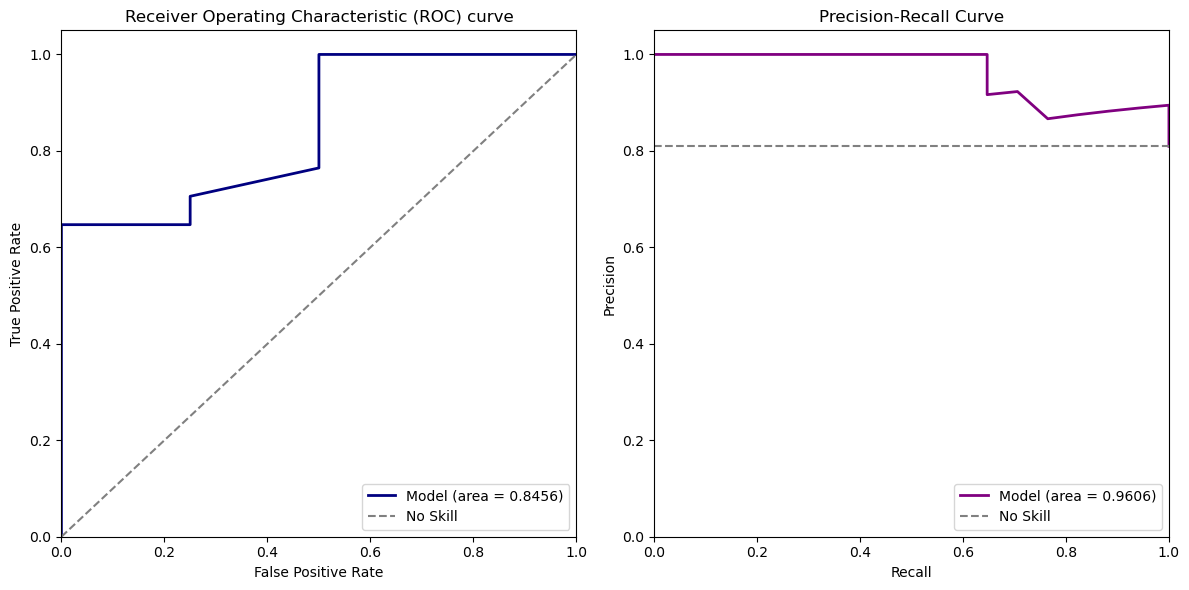

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.94931,0.925742


Distribution of Predictions by Model
[0.04397452 0.51537365 0.69500321 0.86001593 0.95596474]
TP: 14, FP: 2, TN: 2, FN: 3


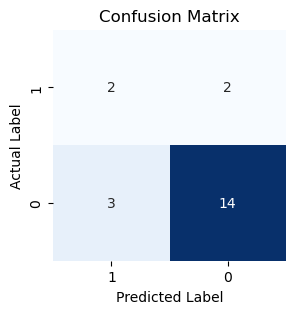

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'ldr': 0.25054275423476713,
 'batch_size': 64,
 'lr': 0.32638292132935404,
 'weight_decay': 0.028267846031413864,
 'momentum': 0.19553183835259166,
 'step_size': 68,
 'loops_train': 250,
 'hd': 4,
 'seed': 42}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelTCGAClassifier('CYCLOPHOSPHAMIDE', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.25054275423476713, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.25054275423476713, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.25054275423476713, 'batch_size': 64, 'lr': 0.32638292132935404, 'weight_decay': 0.028267846031413864, 'momentum': 0.19553183835259166, 'step_size': 68, 'loops_train': 250, 'hd': 4, 'seed': 42}
-------CYCLOPHOSPHAMIDE-------
tcga tr

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,19,"{1: 17, 0: 2}",0.735294,0.967704


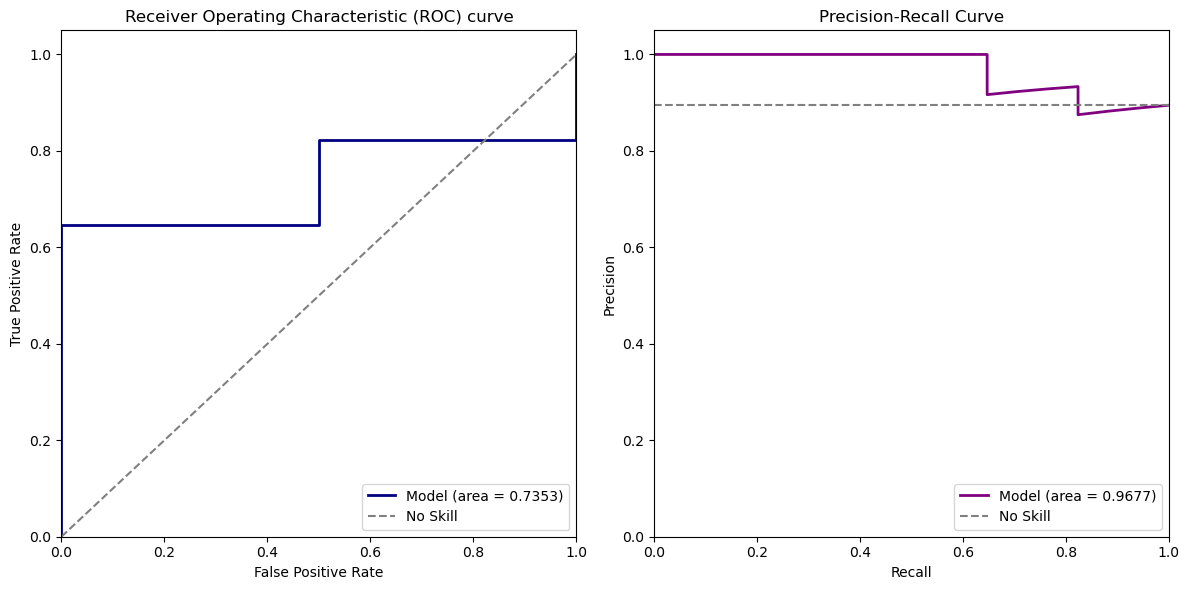

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",0.751773,0.978286


Distribution of Predictions by Model
[0.90774739 0.9080109  0.90811932 0.90818059 0.90896118]
TP: 17, FP: 2, TN: 0, FN: 0


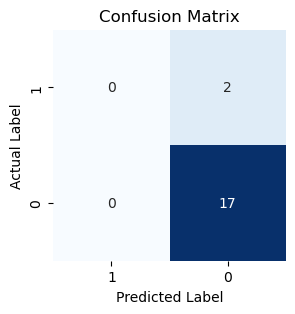

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'ldr': 0.36667210016920193,
 'lr': 0.1799375585577136,
 'weight_decay': 0.06761349259227957,
 'momentum': 0.08221665166640528,
 'step_size': 53,
 'loops_train': 100,
 'hd': 2,
 'batch_size': 32,
 'seed': 42}

In [28]:
model_GEMCITABINE = ModelTCGAClassifier('GEMCITABINE', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.36667210016920193, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
)
flags: {'ldr': 0.36667210016920193, 'lr': 0.1799375585577136, 'weight_decay': 0.06761349259227957, 'momentum': 0.08221665166640528, 'step_size': 53, 'loops_train': 100, 'hd': 2, 'batch_size': 32, 'seed': 42}
-------GEMCITABINE-------
tcga train set size: 35
tcga validation set size: 9
pdx test set size: 0
tcga test set size: 18
Highest AUROC achieved during training: 0.7500000000000001
PDX test set not available
[0.73030907 0.73366935 0.73432291 0.73480996 0.73582707

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,18,"{0: 9, 1: 9}",0.654321,0.721546


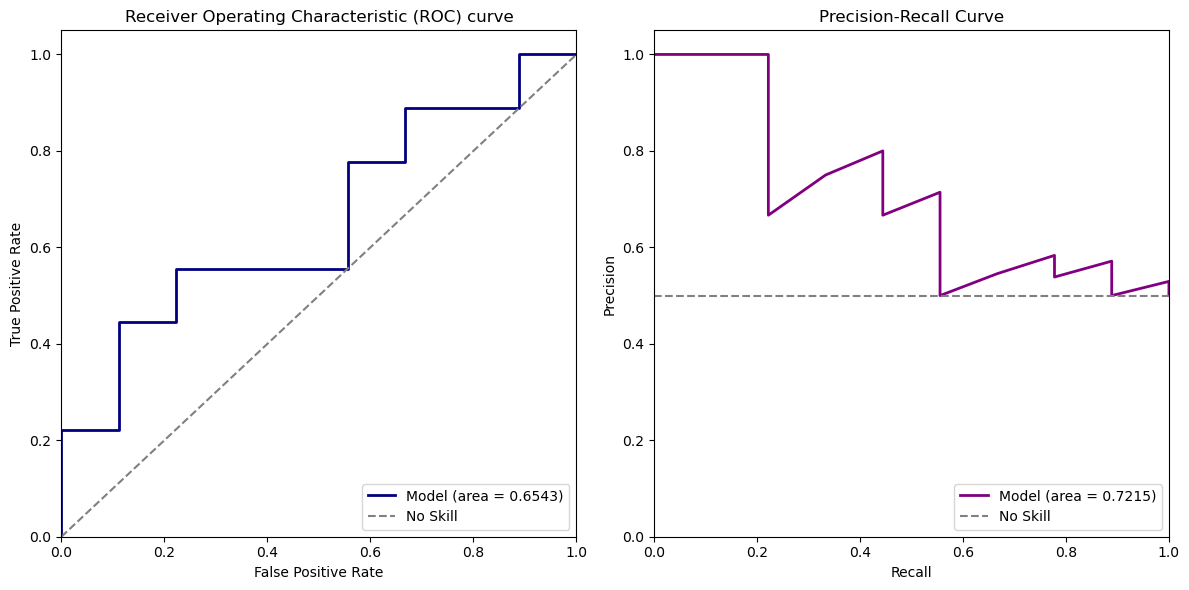

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.715686,0.819591


Distribution of Predictions by Model
[0.73030907 0.73432291 0.73480996 0.73582707 0.73830265]
TP: 9, FP: 9, TN: 0, FN: 0


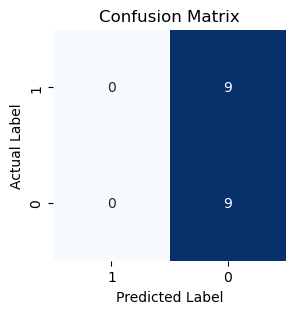

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)